In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

#library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
credits_df = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/credits.csv')
titles_df = pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')

In [9]:
credits_df.head()


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [10]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [14]:
credits_df.shape


(77213, 5)

In [13]:
titles_df.shape

(5806, 15)

In [16]:
dataset = credits_df.merge(titles_df,on="id",how="inner")
dataset

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,7064,tm84618,Albert Brooks,Tom,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
77211,2050199,tm1098060,Mistura Olusanya,Nurse Titi,ACTOR,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


In [17]:
dataset.isnull().count()

person_id               77213
id                      77213
name                    77213
character               77213
role                    77213
title                   77213
type                    77213
description             77213
release_year            77213
age_certification       77213
runtime                 77213
genres                  77213
production_countries    77213
seasons                 77213
imdb_id                 77213
imdb_score              77213
imdb_votes              77213
tmdb_popularity         77213
tmdb_score              77213
dtype: int64

In [18]:
dataset.dropna()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
149,11472,ts22164,Graham Chapman,Various,ACTOR,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
150,11476,ts22164,Michael Palin,"Various / ""It's"" man",ACTOR,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
151,11475,ts22164,Terry Jones,Various,ACTOR,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
152,11474,ts22164,Eric Idle,Various,ACTOR,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
153,11473,ts22164,Terry Gilliam,Various,ACTOR,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76957,2072461,ts309235,Tayc,Marcus,ACTOR,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,"['music', 'romance', 'comedy']",['FR'],1.0,tt15340790,5.8,702.0,6.925,6.9
76958,325075,ts309235,Marion Séclin,Alice,ACTOR,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,"['music', 'romance', 'comedy']",['FR'],1.0,tt15340790,5.8,702.0,6.925,6.9
76959,594986,ts309235,Camille Lou,Mel,ACTOR,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,"['music', 'romance', 'comedy']",['FR'],1.0,tt15340790,5.8,702.0,6.925,6.9
76960,235769,ts309235,Aloïse Sauvage,Jeanne,ACTOR,Christmas Flow,SHOW,An unlikely Christmas romance blossoms between...,2021,TV-MA,50,"['music', 'romance', 'comedy']",['FR'],1.0,tt15340790,5.8,702.0,6.925,6.9


In [20]:
dataset.isna().sum()

person_id                   0
id                          0
name                        0
character                9627
role                        0
title                       1
type                        0
description                53
release_year                0
age_certification       30618
runtime                     0
genres                      0
production_countries        0
seasons                 63237
imdb_id                  3825
imdb_score               4276
imdb_votes               4363
tmdb_popularity            11
tmdb_score               1120
dtype: int64

In [21]:
dataset["release_year"].min()

1953

In [22]:
dataset["release_year"].max()

2022

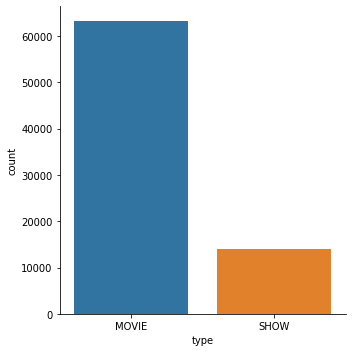

In [25]:
sns.catplot(x='type',kind= 'count', data= dataset)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'R'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'G'),
  Text(4, 0, 'PG-13'),
  Text(5, 0, 'TV-MA'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'TV-Y'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'TV-Y7'),
  Text(10, 0, 'NC-17')])

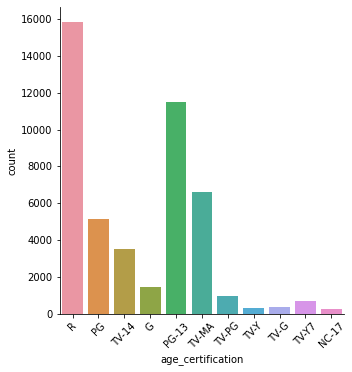

In [27]:
sns.catplot(x='age_certification',kind="count",data=dataset)
plt.xticks(rotation=45)

In [36]:
release_year_count= dataset.release_year.value_counts()

release_year_count = pd.DataFrame(release_year_count)

release_year_count

,release_year
2019,10245
2020,9741
2021,9022
2018,8874
2017,7593
...,...
1956,7
1960,6
1974,6
1978,4


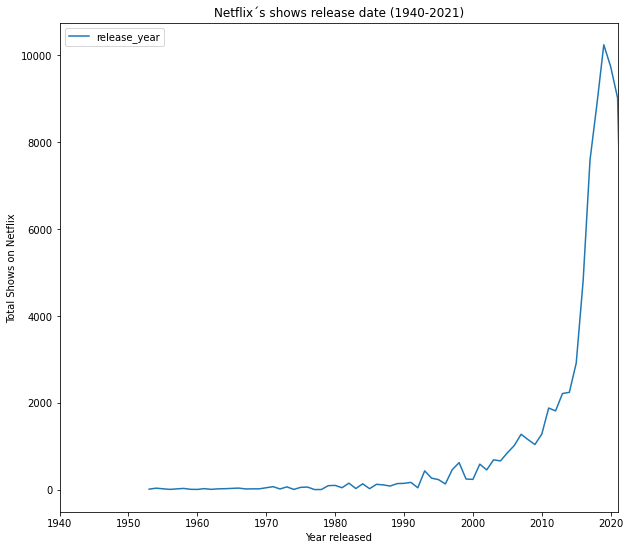

In [39]:
plt.figure(figsize=(10, 9))
sns.lineplot(data= release_year_count)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlim(1940, 2021)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()

In [46]:
b= dataset.groupby('release_year')[['imdb_score']].sum().reset_index()
b

,release_year,imdb_score
0,1953,81.6
1,1954,261.5
2,1956,46.9
3,1958,217.5
4,1959,60.3
...,...,...
61,2018,55626.1
62,2019,60986.5
63,2020,51227.9
64,2021,52706.2


<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

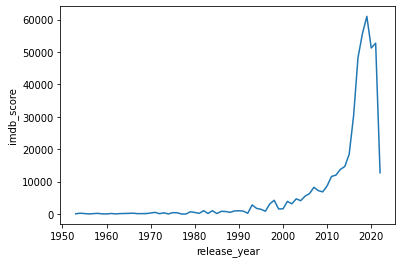

In [48]:
sns.lineplot(x='release_year',y= 'imdb_score',data = b)